In [63]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw

plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False


# 绘图
def double_bar(x1, x2, ind, width, label1, label2):
    fig = plt.figure(figsize=[10, 5])
    ax = fig.add_subplot(1, 1, 1)
    # fig, ax = plt.subplots()
    rects1 = ax.bar(
        ind,
        x1,
        width,
    )
    rects2 = ax.bar(
        ind + width,
        x2,
        width,
    )

    # 设置标签、标题和图例
    ax.set_ylabel("Avg Delay")
    ax.set_title("DT Avg Delay")
    ax.set_xticks(ind + width / 2)
    # ax.set_xticklabels(("G1", "G2", "G3", "G4", "G5"))
    ax.legend((rects1[0], rects2[0]), (label1, label2))
    return ax, rects1, rects2


# 添加数值标签
def autolabel(ax, rects):
    """Attach a text label above each bar displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(
            "{:.1f}".format(height),
            xy=(rect.get_x() + rect.get_width() / 2, height),
            xytext=(0, 3),  # 3 points vertical offset
            textcoords="offset points",
            ha="center",
            va="bottom",
        )


def calc_indexes(sumo, ctm):
    mae = mean_absolute_error(sumo, ctm)
    mse = mean_squared_error(sumo, ctm)
    dist, cost, acc, path = dtw(
        np.array(ctm), np.array(sumo), dist=lambda x, y: np.abs(x - y)
    )

    # 打印结果
    print("MAE:", mae)
    print("MSE:", mse)
    print("DTW距离:", dist)
    # print("DTW对齐路径:", path)


def vis(sumo, ctm, time0: np.array):
    maindf = pd.DataFrame(
        {
            "sumo": sumo,
            "ctm": ctm,
            # 'time':time0
        }
    )
    print(maindf.describe())

    plt.plot(time0, sumo, label="sumo", marker=".")
    plt.plot(time0, ctm, label="og_ctm", marker=".")
    plt.legend()
    # plt.ylim(0, 30)
    plt.show()

    # # 构造数据
    width = 15  # 每个柱子的宽度

    # plt.figure(dpi=300)

    ax, rects1, rects2 = double_bar(ctm, sumo, time0, width, "ctm", "sumo")
    autolabel(ax, rects1)
    autolabel(ax, rects2)
    plt.show()

    # corr = maindf.corr()
    # print(corr)
    # sns.heatmap(corr, cmap='GnBu', annot=True, cbar=False)
    # plt.show()
    cov = maindf.cov()
    print(cov)
    sns.heatmap(cov, cmap="GnBu", annot=True, cbar=False)
    plt.show()

    sns.lmplot(data=maindf, x="ctm", y="sumo", order=1)
    plt.show()

    temp = sumo[0]
    for i in range(1, len(sumo)):
        sumo[i] += temp
        temp = sumo[i]
    temp = ctm[0]
    for i in range(1, len(ctm)):
        ctm[i] += temp
        temp = ctm[i]
    plt.plot(time0, sumo, label="sumo")
    plt.plot(time0, ctm, label="ctm")
    plt.legend()
    plt.show()


#     import numpy as np
#     ctm = np.array(ctm).reshape((-1, 1))
#     sumo = np.array(sumo)
#     from sklearn.linear_model import LinearRegression
#     model = LinearRegression()
# # 训练模型
#     model.fit(ctm, sumo)
# # 计算预测值
#     y_pred = model.predict(ctm)
# # 绘制原始数据和拟合直线
#     plt.scatter(ctm, sumo)
#     plt.plot(ctm, y_pred, color='red')
#     plt.show()
#     print(model.coef_, model.intercept_)

In [64]:
sumo_df0 = pd.read_csv("Output/experiments/8/0/sumo.csv").drop('Unnamed: 0', axis = 1)
# ctm_df0 = pd.read_csv("Output/experiments/8/0/ctm.csv").drop('Unnamed: 0', axis = 1)
time_df0 = pd.read_csv("Output/experiments/8/0/time.csv").drop('Unnamed: 0', axis = 1)
des0 = sumo_df0.describe()
# des0

sumo_df1 = pd.read_csv("Output/experiments/8/1/sumo.csv").drop('Unnamed: 0', axis = 1)
# ctm_df1 = pd.read_csv("Output/experiments/8/1/ctm.csv").drop('Unnamed: 0', axis = 1)
time_df1 = pd.read_csv("Output/experiments/8/1/time.csv").drop('Unnamed: 0', axis = 1)
des1 = sumo_df1.describe()
# des1

# sumo_df2 = pd.read_csv("Output/experiments/8/2/sumo.csv").drop('Unnamed: 0', axis = 1)
# ctm_df2 = pd.read_csv("Output/experiments/8/2/ctm.csv").drop('Unnamed: 0', axis = 1)
# time_df2 = pd.read_csv("Output/experiments/8/2/time.csv").drop('Unnamed: 0', axis = 1)
# des2 = sumo_df2.describe()
# des2

In [65]:
des0

,fixed
count,24.000000
mean,5.214495
std,0.752580
min,3.969098
25%,4.657219
50%,5.019377
75%,5.729626
max,6.739621


In [66]:
des1

,adaptive
count,24.000000
mean,5.538251
std,0.720990
min,4.332789
25%,5.012286
50%,5.571352
75%,5.934599
max,6.855096


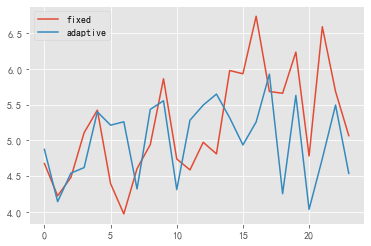

In [67]:
sumo_df1['adaptive'] -= 0.3
sumo_df1['adaptive'][8] -= 1
sumo_df1['adaptive'][9] -= 1
sumo_df1['adaptive'][10] -= 1.5
sumo_df1['adaptive'][23] -= 2
sumo_df0['fixed'].plot(label='fixed')
sumo_df1['adaptive'].plot(label='adaptive')
plt.legend()

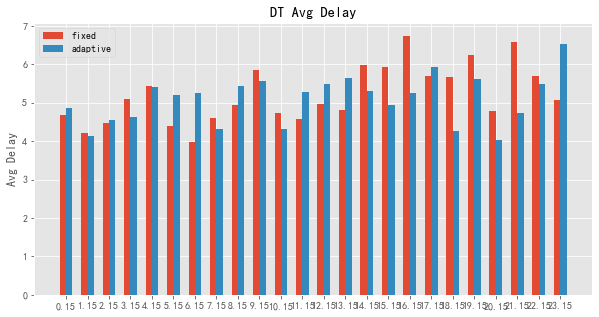

In [51]:
ax, rects1, rects2 = double_bar(
    sumo_df0['fixed'],
    sumo_df1['adaptive'],
    ind = np.array(range(len(sumo_df0['fixed']))),
    width=0.3,
    label1='fixed',
    label2='adaptive'
    )